# Leverage Effekt
*Auswirkung des Finanzierungsverhältnisses auf die Rendite*

Im Folgenden geht es darum, die Auswirkung eines sich verändernden
Finanzierungsverhältnisses (Fremd- im Verhältnis zum Eigenkapital) auf die Eigenkapitalrendite zu
studieren.

Nehmen Sie dazu ein fiktives Unternehmen mit einem Gesamtkapital von
100\. Um die Auswirkungen des sich verändernden
Finanzierungsverhältnisses zu beobachten, ersetzen Sie in
Zehnerschritten - beginnend bei 90 - Eigenkapital durch Fredmdapital.
Das heisst, Sie beginnen mit 90 Eigenkapital und 10 Fremdkapital.

Gehen Sie für Ihren Test von einer Gesamtkapitalrendite
von 12% aus.

Damit Sie den Effekt vollständig beobachten können, machen Sie drei
Durchläufe. Den ersten mit 5% Zins für das Fremdkapital, dann mit 10%
und zum Schluss mit 15%.

Berechnen Sie für alle drei Zinssätze die Eigenkapitalrentabilität.

Zur Erinnerung die Formeln für die Berechnung der

- Gesamtkapitalrendite: $RoI = \frac{Gewinn}{Gesamtkapital} \cdot 100$
- Eigenkapitalrendite: $RoE = \frac{Gewinn}{Eigenkapital} \cdot 100$

## Versuchsanordnung

In der folgenden Zelle werden die für die Auswertung erforderlichen
Libraries importiert.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### Anlage der Versuchsdaten

Erstellen Sie eine Liste `ek_liste` aus den Literalen $90, 80, ... ,
10$. Die anderen erforderlichen Listen können Sie aus dieser mittels
[list comprehensions](https://realpython.com/list-comprehension-python/)
berechnen.

Geben Sie die so erstellten Listen der Eigenkapitalrentabilität bei 5%,
10% und 15% Zins für das Fremdkapital aus.

In [3]:
ek_liste = [90, 80, 70, 60, 50, 40, 30, 20, 10]
fk_liste = [100 - ek for ek in ek_liste]
gewinne_05 = [12 - fk * 0.05 for fk in fk_liste]
gewinne_10 = [12 - fk * 0.10 for fk in fk_liste]
gewinne_15 = [12 - fk * 0.15 for fk in fk_liste]
roe_05 = [gewinn / ek * 100 for gewinn, ek in zip(gewinne_05, ek_liste)]
roe_10 = [gewinn / ek * 100 for gewinn, ek in zip(gewinne_10, ek_liste)]
roe_15 = [gewinn / ek * 100 for gewinn, ek in zip(gewinne_15, ek_liste)]

print(f'Liste mit RoE bei 5% Fremdkapitalzinsen: \n {roe_05}')
print(f'Liste mit RoE bei 10% Fremdkapitalzinsen: \n {roe_10}')
print(f'Liste mit RoE bei 15% Fremdkapitalzinsen: \n {roe_15}')

Liste mit RoE bei 5% Fremdkapitalzinsen: 
 [12.777777777777777, 13.750000000000002, 15.0, 16.666666666666664, 19.0, 22.5, 28.333333333333332, 40.0, 75.0]
Liste mit RoE bei 10% Fremdkapitalzinsen: 
 [12.222222222222221, 12.5, 12.857142857142856, 13.333333333333334, 14.000000000000002, 15.0, 16.666666666666664, 20.0, 30.0]
Liste mit RoE bei 15% Fremdkapitalzinsen: 
 [11.666666666666666, 11.25, 10.714285714285714, 10.0, 9.0, 7.5, 5.0, 0.0, -15.0]


### Visualisierung

Weil die wenigsten Menschen Gesetzmässigkeiten von Zahlen in Tabellen
erkennen können, ist es sinnvoll, die Daten als Hilfestellung grafisch
darzustellen.

Dazu wird die Python Library
[matplotlib](https://matplotlib.org/)
verwendet.

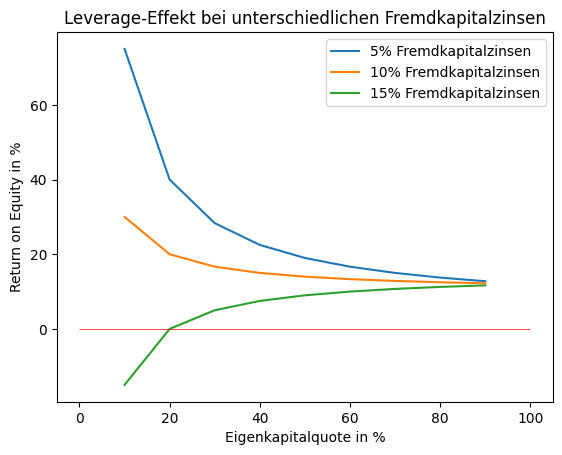

In [4]:
x = ek_liste

fig, ax = plt.subplots()
ax.plot(x, roe_05, label='5% Fremdkapitalzinsen')
ax.plot(x, roe_10, label='10% Fremdkapitalzinsen')
ax.plot(x, roe_15, label='15% Fremdkapitalzinsen')
ax.hlines(y=0, xmin=0, xmax=100, color='red', linewidth=0.5)

plt.xlabel('Eigenkapitalquote in %')
plt.ylabel('Return on Equity in %')
plt.legend()

plt.title('Leverage-Effekt bei unterschiedlichen Fremdkapitalzinsen')

plt.show()

### Formulierung der Beobachtung

Die Resultate des Experimentes lassen sich in folgendem Satz
zusammenfassen:

Unter der Voraussetzung, dass der Zinssatz für das Fremdkapital tiefer
ist als die Gesamtkapitalrentabilität, lässt sich die
Eigenkapitalrentabilität steigern, indem Eigenkapital durch Fremdkaptial
substituiert wird.


## Alternative Datenaufbereitung mit pandas

Um alle Daten an einem Ort zu bündeln, kann alterantiv auch mit der
[pandas](https://pandas.pydata.org/)
Library gearbeitet werden. Diese Library wurde spezifisch für die
Bedürfnisse von Data Scientists programmiert. Entsprechend bietet sie
einen komfortablen Umgang mit Tabellen.

Tabellen werden in pandas als Data Frame bezeichnet. Es hat sich
eingebürgert, für den Data Frame, mit dem gearbeitet wird, die Variabel
`df` zu verwenden.

Spalten im Data Frame können aus einem 
[Dictionary](https://realpython.com/python-dicts/)
erzeugt werden.

In [5]:
df = pd.DataFrame({'EK': [90, 80, 70, 60, 50, 40, 30, 20, 10]})

Weitere Spalten können dem Data Frame via
einfache Berechnungen oder mit list comprehensions hinzugefügt werden.

In [6]:
# Variante Berechnung FK
df['FK'] = 100 - df['EK']

In [7]:
# Variante list comrehension zur Erfassung des FK
df['FK'] = [100 - ek for ek in df['EK']]

Um die erstellten Data Frames anzuzeigen, können Sie mit der Methode
`df.to_string()` der Funktion `print()` übergeben werden.

In [8]:
print(df.to_string())

   EK  FK
0  90  10
1  80  20
2  70  30
3  60  40
4  50  50
5  40  60
6  30  70
7  20  80
8  10  90


Wenn es sich um einen grossen Datensatz handelt, kann die Ausgabe mit
`df.head()` auf die ersten fünf Zeilen begrenzt werden. Wenn der Methode
`head()` eine Zahl als Parameter übergeben wird, wird die entsprechende
Anzahl Zeilen ausgegeben.

In [9]:
print(df.head(2))

   EK  FK
0  90  10
1  80  20


Mit diesen Angaben können Sie jetzt den Data Frame um die erforderlichen
Spalten ergänzen.

In [10]:
df['Gewinn_05'] = 12 - df['FK'] * 0.05
df['Gewinn_10'] = 12 - df['FK'] * 0.10
df['Gewinn_15'] = 12 - df['FK'] * 0.15
df['RoE_05'] = df['Gewinn_05'] / df['EK'] * 100
df['RoE_10'] = df['Gewinn_10'] / df['EK'] * 100
df['RoE_15'] = df['Gewinn_15'] / df['EK'] * 100

print(df.to_string())

   EK  FK  Gewinn_05  Gewinn_10  Gewinn_15     RoE_05     RoE_10     RoE_15
0  90  10       11.5       11.0       10.5  12.777778  12.222222  11.666667
1  80  20       11.0       10.0        9.0  13.750000  12.500000  11.250000
2  70  30       10.5        9.0        7.5  15.000000  12.857143  10.714286
3  60  40       10.0        8.0        6.0  16.666667  13.333333  10.000000
4  50  50        9.5        7.0        4.5  19.000000  14.000000   9.000000
5  40  60        9.0        6.0        3.0  22.500000  15.000000   7.500000
6  30  70        8.5        5.0        1.5  28.333333  16.666667   5.000000
7  20  80        8.0        4.0        0.0  40.000000  20.000000   0.000000
8  10  90        7.5        3.0       -1.5  75.000000  30.000000 -15.000000


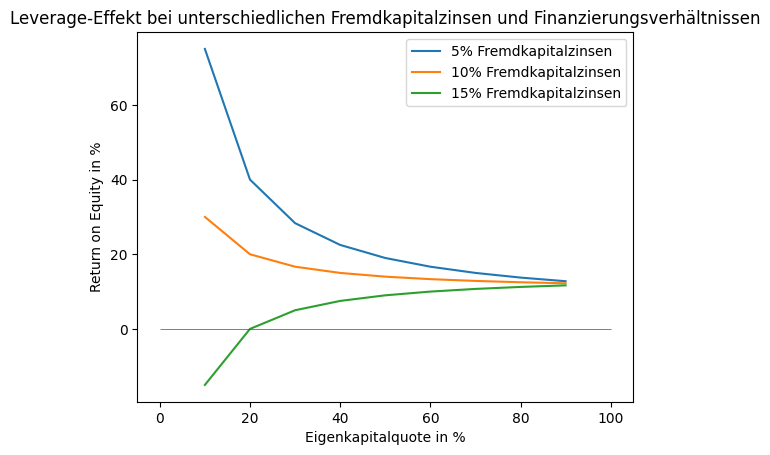

In [12]:
df.plot(x='EK', y=['RoE_05', 'RoE_10', 'RoE_15'],
        title='Leverage-Effekt bei unterschiedlichen Fremdkapitalzinsen und Finanzierungsverhältnissen', xlabel='Eigenkapitalquote in %', ylabel='Return on Equity in %')
plt.legend(['5% Fremdkapitalzinsen', '10% Fremdkapitalzinsen', '15% Fremdkapitalzinsen'])
plt.hlines(y=0, xmin=0, xmax=100, color='red', linewidth=0.5)
plt.show()

Neben der Entwicklung der Eigenkapitalrentabilität bei unterschiedlichen
Zinsen und Finanzierungsverhältnissen hilft möglicherweise auch die
Gegenüberstellung der Entwicklung des Gewinnes und des Eigenkaptials für
das Verständnis des Leverage Effektes.

In [13]:
df['Gewinnentwicklung_05'] = df['Gewinn_05'] / df['Gewinn_05'].shift(-1) - 1
df['Entwicklung_EK'] = df['EK'] / df['EK'].shift(-1) - 1

print(df.to_string())

   EK  FK  Gewinn_05  Gewinn_10  Gewinn_15     RoE_05     RoE_10     RoE_15  Gewinnentwicklung_05  Entwicklung_EK
0  90  10       11.5       11.0       10.5  12.777778  12.222222  11.666667              0.045455        0.125000
1  80  20       11.0       10.0        9.0  13.750000  12.500000  11.250000              0.047619        0.142857
2  70  30       10.5        9.0        7.5  15.000000  12.857143  10.714286              0.050000        0.166667
3  60  40       10.0        8.0        6.0  16.666667  13.333333  10.000000              0.052632        0.200000
4  50  50        9.5        7.0        4.5  19.000000  14.000000   9.000000              0.055556        0.250000
5  40  60        9.0        6.0        3.0  22.500000  15.000000   7.500000              0.058824        0.333333
6  30  70        8.5        5.0        1.5  28.333333  16.666667   5.000000              0.062500        0.500000
7  20  80        8.0        4.0        0.0  40.000000  20.000000   0.000000             

Mit `df['Gewinn_05'].shift(-1)` wird der Wert aus der Spalte
`'Gewinn_05'` mit dem um eins kleineren Index als der aktuelle in die
Berechnung einbezogen.

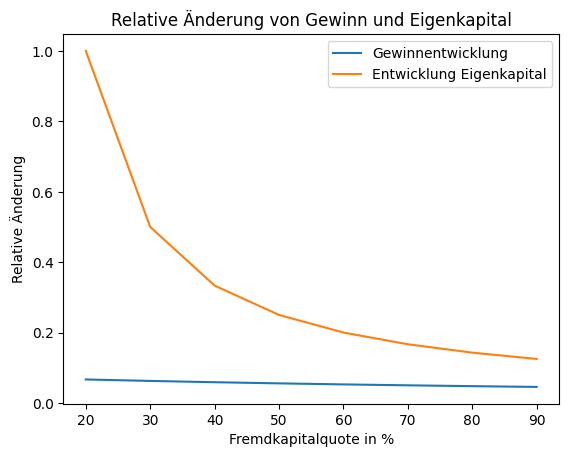

In [14]:
df.plot(x='EK', y=['Gewinnentwicklung_05', 'Entwicklung_EK'],
        title='Relative Änderung von Gewinn und Eigenkapital',
        xlabel='Fremdkapitalquote in %',
        ylabel='Relative Änderung')
plt.legend(['Gewinnentwicklung', 'Entwicklung Eigenkapital'])
plt.show()

Der Plot zeigt deutlich, dass die relative Veränderung des Eigenkapitals
viel grösser ausfällt als die relative Veränderung des Gewinnes.
Entsprechend kann man die Reduktion des Gewinnes in Kauf nehmen, weil er
gemessen am eingesetzten Eigenkaptial immer grösser wird.